# Encoding Numerical Data
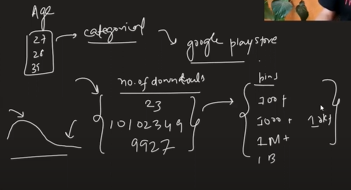

We can create bins for 100+downloads, 1000+downloads because normal numercial data is helping much.

some apps have many downloads while a large amount of apps have few downloads

Two Techniques to Encode Numerical Data: 
1. Discretization or Binning
2. Binarization

#### Discritization 

It is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretization is also called binning, where bin is an alternative name for interval.

Why Discretization:

1. to handle outliers
2. to improve the values spread


# types of discritization

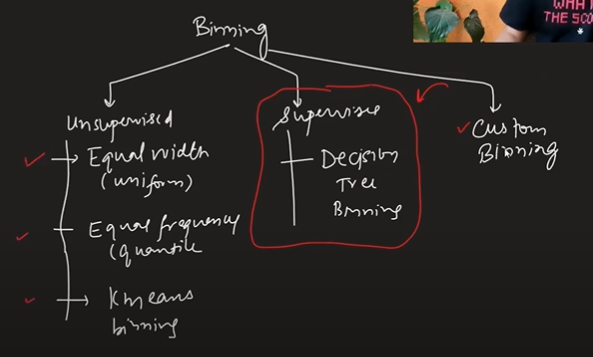

#### 1. Equal Width/Uniform Binning: (max-min)/number of bins <br> age_trf == discrete bins(can be said class 1 to 5).

Uses: Outliers detection and No Change in spread of the data.

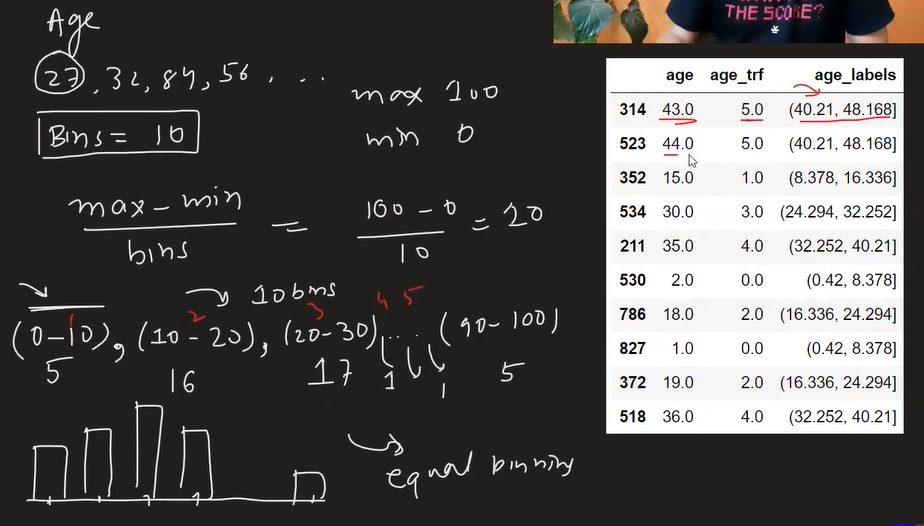

#### 2. Equal Frequency/ Quantile Binning: 

In this technique, we divide the data into parts which have equal frequency or intervals.

for example Intervals = 10 means each bin will have 10% of the data and you will evantually get 10 different bins.

Uses: Outliers pe achakaam karta hai and value spread ko uniform banata hai (ISILYE ZAYAADA USE hota hai).

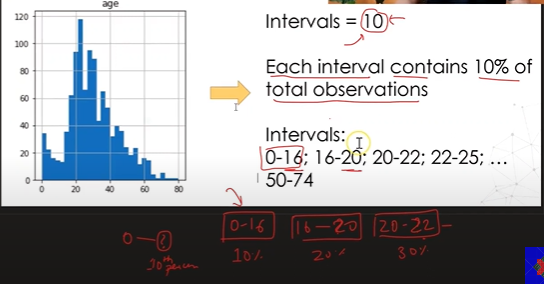

#### 3. K-Means Binning:


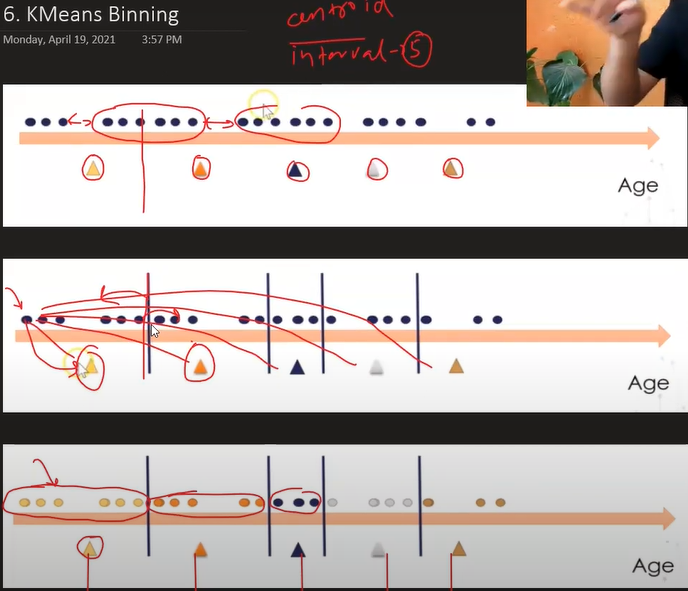
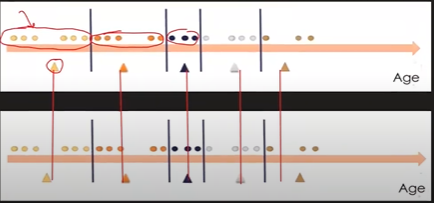
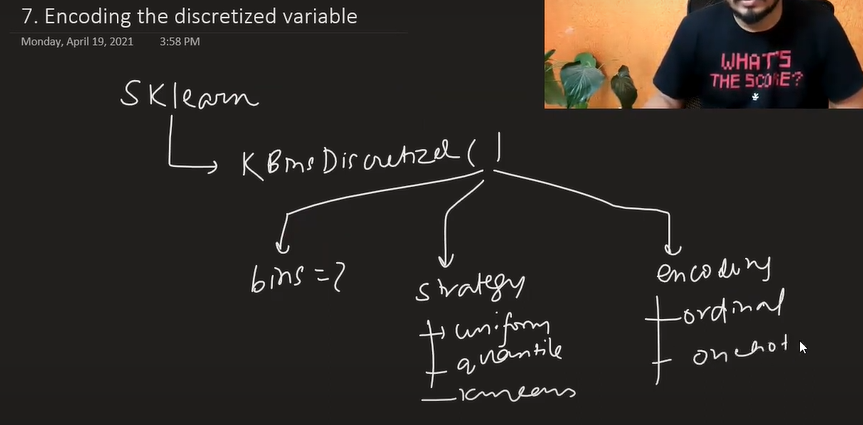

# Binning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('Datasets/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.dropna(inplace=True)
df.shape

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(2)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [ ]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [ ]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [ ]:
trf.named_transformers_['first'].n_bins

In [ ]:
trf.named_transformers_['first'].bin_edges_

In [ ]:

trf.named_transformers_['second'].bin_edges_

In [ ]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [ ]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [ ]:
output.sample(5)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

In [ ]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

In [ ]:
discretize(5,'kmeans')

# Custom Binning

can not do it using sklearn has to write a function using pandsas and your own logic.

foe example diving a range of [0 to 100] ages in tkids, adult, old
you already have knowledge of this age so decide your own ages.

[0-18] = kids
[18-60] = adults
[60-80] = senior

# Binarization

example: image processing [0 255] color images.
threshold = 127.5 if value less than 127.5 mark it 0 else 1.

so dividing in 0 or 1 based on threshold.


1. binarizer has two parameter threshold, copy=true, new column for salary.
2. binarizer has two parameter threshold, copy=false, change in the same column for salary.

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [44]:
df = pd.read_csv('Datasets/train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [45]:
df.dropna(inplace=True)
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [46]:
df['family'] = df['SibSp'] + df['Parch']
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [47]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,Age,Fare,SibSp,Parch,family
328,31.0,20.5250,1,1,2
73,26.0,14.4542,1,0,1
253,30.0,16.1000,1,0,1
719,33.0,7.7750,0,0,0
666,25.0,13.0000,0,0,0


In [49]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6363636363636364

In [50]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.648474178403756

In [51]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

# for knowing the person is alone or not

In [52]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [53]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [60]:
X_train_trf.shape
X_test_trf.shape

(143, 5)

In [63]:
pd.DataFrame(X_train_trf,columns=['Age',	'Fare',	'SibSp',	'Parch',	'family'])

,Age,Fare,SibSp,Parch,family
0,1.0,31.0,20.5250,1.0,1.0
1,1.0,26.0,14.4542,1.0,0.0
2,1.0,30.0,16.1000,1.0,0.0
3,0.0,33.0,7.7750,0.0,0.0
4,0.0,25.0,13.0000,0.0,0.0
...,...,...,...,...,...
566,1.0,46.0,61.1750,1.0,0.0
567,0.0,25.0,13.0000,0.0,0.0
568,0.0,41.0,134.5000,0.0,0.0
569,1.0,33.0,20.5250,1.0,1.0


In [64]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6083916083916084

In [65]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))


0.6331377151799688